- Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pytides2.tide import Tide
import pytides2.constituent  as cons
import pytides2.astro as astro
from datetime import datetime, timedelta
from matplotlib import font_manager as fm
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import random
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
path_font=r"G:\My drive\TESIS_MAESTRIA_PAULAE\Fonts\Quicksand"

prop1 = fm.FontProperties(fname=path_font+'\Quicksand-Medium.ttf')
prop2 = fm.FontProperties(fname=path_font+'\Quicksand-SemiBold.ttf')
prop1.set_size(12)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def angulo_norte(x,y):
    if x > 0 and y > 0:
        theta = 90 - (np.arctan(abs(y/x))*(180/np.pi))
    elif x < 0 and y > 0:
        theta = 270 + (np.arctan(abs(y/x))*(180/np.pi))
    elif x < 0 and y < 0:
        theta = 270 - (np.arctan(abs(y/x))*(180/np.pi))
    else:
        theta = 90 + (np.arctan(abs(y/x))*(180/np.pi))
    return theta

# Tide data

In [5]:
path = r"G:\My Drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\DATOS_CAMPO\DATOS_SAI_4_15_nov_2021\Aqualoggers\Aq02_6 meses_MuelleCove"
data = pd.read_csv(path+'/NivelMAr_Cove_6meses_13Nov2021.csv',sep=',',encoding = "ISO-8859-1",header=21) # Modeficar ruta

P = data[' bar    '].values                 # Obtener los valores de presión [bares] 
time2 = data[' Timecode'].values             # Obtener los tiempos
fechas_str = (i for i in time2)              # Convertir las fechas en un str
time_data = np.array([datetime.strptime(i,'%m/%d/%Y %I:%M:%S %p') for i in fechas_str]) # Convertir fechas en arreglo de numpy con datetime 
h = (P-1.01325)*(100000/(9.8*1027))
df = pd.DataFrame(data=h,index= time_data,columns=['h']) 

## Metadatos de medicióin

In [6]:
ini_date = datetime(2021,11,6,13,0,0)                       # Entrar la fecha de inicio de toma de datos 
end_date = datetime(2021,11,13,11,0,0)                          # Entrar la fecha final de toma de datos
df = df[ini_date:end_date]
marea = df.h.values -df.h.mean()
t = time_data[np.where(time_data == ini_date)[0][0]:np.where(time_data == end_date)[0][0]+1]

## Descomposición de marea

In [7]:
my_tide = Tide.decompose(marea, t)

## Constituyentes

In [9]:
constituent = [c.name for c in my_tide.model['constituent']]
df_constituent = pd.DataFrame(my_tide.model, index = constituent).drop('constituent',axis=1)
df_constituent.reset_index(inplace=True)
const_tidal= df_constituent.sort_values('amplitude', ascending = False)

In [10]:
const_tidal

,index,amplitude,phase
20,rho1,6.877122e+03,270.904145
21,Q1,5.505458e+03,141.114298
4,K1,3.538395e+03,226.007236
25,P1,3.517478e+03,136.837472
13,mu2,1.739849e+03,3.252613
6,O1,1.705632e+03,175.835003
22,T2,1.701905e+03,309.960093
1,M2,1.569622e+03,132.277108
30,K2,1.484791e+03,163.586991
14,2N2,1.234293e+03,232.253499


In [10]:
# c1 = cons.noaa
# constituents = [c for c in c1 if not c == cons._Z0]
# constituents = [
#             c for c in constituents if 360.0 * 2 < hours[-1] * c.speed(astro.astro(ini_date))
#         ]
# speed, u, f, V0 = Tide._prepare(constituents,ini_date, t, radians=True)

# rho1 = const_tidal.amplitude.values[0]/1000*np.cos(const_tidal.w.values[0]*np.arange(1,len(t)+1,1)+math.radians(const_tidal.phase.values[0]))
# Q1 = const_tidal.amplitude.values[1]/1000*np.cos(const_tidal.w.values[1]*np.arange(1,len(t)+1,1)+math.radians(const_tidal.phase.values[1]))
# MU2 = const_tidal.amplitude.values[2]/1000*np.cos(const_tidal.w.values[2]*np.arange(1,len(t)+1,1)+math.radians(const_tidal.phase.values[2]))

# hourticks = ((t[-1]-t[0]).days*24 +(t[-1]-t[0]).seconds/3600+12) # Mover parámetro 12
# xticks_time = np.array([t[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

# fig, axs = plt.subplots(1,1,figsize=(15,10))
# ax = axs[0]
# ax.plot(t, rho1, label = 'u_1', ms=5, color = 'k')
# ax.plot(t, Q1, label = '$\zeta_1$', ms=5, color = 'r')
# ax.plot(t, MU2, label = '$\zeta_1$', ms=5, color = 'blue')

# ax.set_xticks(xticks_time)
# date_format = mdates.DateFormatter('%y-%m-%d %H')
# ax.xaxis.set_major_formatter(date_format)
# ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
# ax.set_ylabel ('Velocidad $U$ [m/s]',size=16,fontproperties=prop1)
# ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
# for label in ax.get_xticklabels():
#     label.set_fontproperties(prop1)
#     label.set_color('gray')
#     label.set_size(12)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
# ax.set_title('componente1 '+str(const_tidal.index.values[0]),size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
# plt.xticks(rotation=30)
# ax.grid(True)

## Tipo de marea
- Factor forma y rango de marea

In [11]:
print(my_tide.classify())
print('Factor de forma {}'.format(my_tide.form_number()))

mixed (diurnal)
Factor de forma [2.06426478]


## Marea astronómica

In [12]:
astro_tide = my_tide.at(t)
meteo_tide = marea - astro_tide

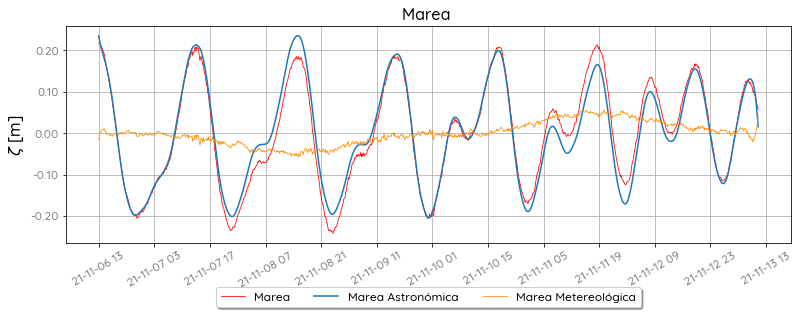

In [13]:
# Mareas
hourticks = ((t[-1]-t[0]).days*24 +(t[-1]-t[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([t[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(t, marea, ms=5, label = 'Marea', color = 'r', lw = 0.8)
ax.plot(t, astro_tide, label = 'Marea Astronómica')
ax.plot(t,meteo_tide, color = 'darkorange', lw = 0.8, ms=5, label = 'Marea Metereológica')
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('$\zeta$ [m]',size=16,fontproperties=prop1)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('Marea ',size = 16,fontproperties=prop1)   # Subtítulo de la figura
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation=30)
ax.grid(True)

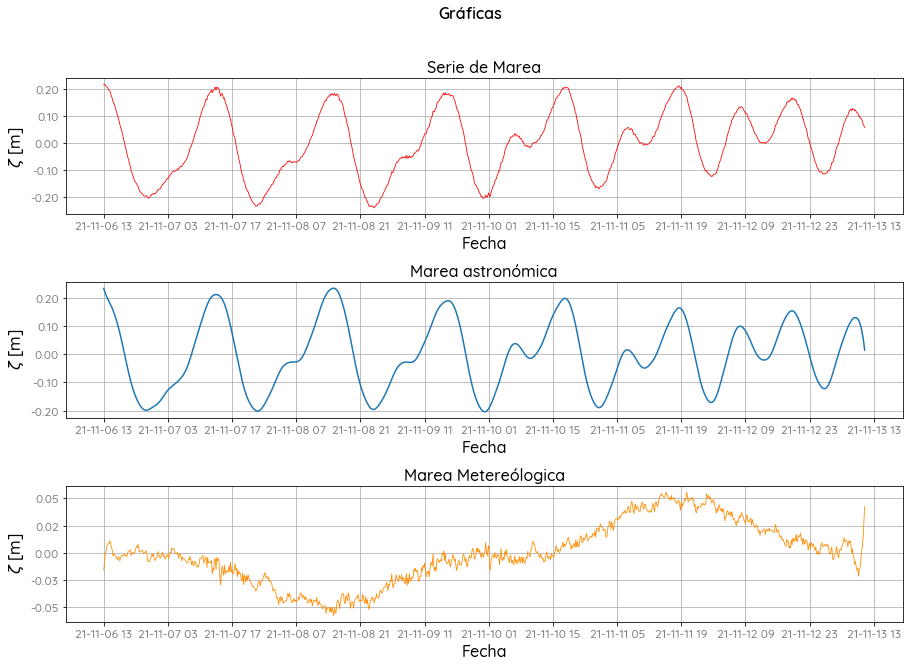

In [14]:
# Grafico descomposición de marea
hourticks = ((t[-1]-t[0]).days*24 +(t[-1]-t[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([t[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

fig, axs = plt.subplots(3,1,figsize=(15,10))
ax = axs[0]
ax.plot(t, marea, color = 'r', lw = 0.8, ms=5)
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('$\zeta$ [m]',size=16,fontproperties=prop1)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('Serie de Marea',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation=30)
ax.grid(True)

ax1 = axs[1]

ax1.plot(t,astro_tide, ms=5)
ax1.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax1.set_ylabel (' $\zeta$ [m]',size=16,fontproperties=prop1)
ax1.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_title('Marea astronómica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax1.grid(True)


ax2 = axs[2]

ax2.plot(t,meteo_tide, color = 'darkorange', lw = 0.8, ms=5)
ax2.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax2.set_ylabel (' $\zeta$ [m]',size=16,fontproperties=prop1)
ax2.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax2.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_title('Marea Metereólogica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax2.grid(True)

plt.xticks(rotation=0)
ax1.grid(True)
plt.subplots_adjust(hspace=0.5)
#      left=0.125,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.2, 
                    
# ax.set_title('Velocidad superficial',size=15)
# plt.savefig('E:/Escritorio/INFORME 1ER AÑO UNAL/Anexo_B1/velocidad_2D.png',dpi=800,bbox_inches='tight',pad_inches=0)

# Meteo data

In [15]:
paht = r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\DATOS_CAMPO\DATOS_SAI_4_15_nov_2021\METEO_CALIPSO"
data = pd.read_csv(paht+'\Descargados_13Nov2021_400pm.txt', delimiter = "\t", header = 1) # Modeficar ruta

In [16]:
Date = data.Date.values
Time = data.Time.values
time = [Date[i][0:6]+'2021'+' '+ Time[i]+'m' for i in range (0,len(Date))]
fechas_str = (i for i in time)
time_meteo = np.array([datetime.strptime(i, '%m/%d/%Y %I:%M %p') for i in fechas_str])
data['time']=time_meteo
data = data.set_index('time')
data.drop(['Date','Time'],axis=1)
data.tail(5)

,Date,Time,Out,Temp,Temp.1,Hum,Pt.,Speed,Dir,Run,...,Temp.2,Hum.1,Dew,Heat,EMC,Density,Samp,Tx,Recept,Int.
time,,,,,,,,,,,,,,,,,,,,,
2021-11-13 14:30:00,11/13/21,2:30 p,26.6,28.8,26.1,---,---,8.9,E,16.09,...,29.9,72,24.3,35.4,13.23,1.1258,398,8,68.5,30
2021-11-13 15:00:00,11/13/21,3:00 p,28.2,28.3,26.7,---,---,3.1,ENE,5.63,...,31.1,73,25.7,38.0,13.49,1.1184,355,8,61.1,30
2021-11-13 15:30:00,11/13/21,3:30 p,28.6,28.6,28.2,---,---,4.9,NE,8.85,...,31.3,73,25.9,38.9,13.48,1.1168,414,8,71.3,30
2021-11-13 16:00:00,11/13/21,4:00 p,28.6,28.7,28.6,---,---,5.8,NE,10.46,...,31.6,73,26.1,39.7,13.47,1.1152,467,8,80.4,30
2021-11-13 16:30:00,11/13/21,4:30 p,28.7,28.7,28.6,---,---,4.9,NE,8.85,...,31.2,74,26.0,38.7,13.79,1.1167,529,8,91.0,30


In [17]:
df_meteo = data[ini_date:end_date]
end_date =  datetime.fromtimestamp(df_meteo.index.values[-1].astype('O')/1e9)+timedelta(hours=5)
Vwind = df_meteo['Speed'].values
Patm = df_meteo['Bar  '].values
Dir = [str(i) for i in df_meteo['Dir']]# Dir compass
t2 = time_meteo[np.where(time_meteo == ini_date)[0][0]:np.where(time_meteo == end_date)[0][0]+1]

## Covertir compas a grados

In [18]:
# Función para convertir compás a grados 
direc = np.arange(11.25,360,22.5)
direc = np.insert(direc,0,direc[-1])
compass = ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
def compass2degree(comp):
    if comp == 'nan':
        deg = np.nan
    else:
        ind = compass.index(comp)
        deg = round(random.uniform(direc[ind], direc[ind+1]),1)
        return deg
    
dir_degree = np.zeros(shape=(Vwind.shape[0]))
for i in range (0, len(Dir)): 
#     if Dir[i]=='---':
#         Dir[i]='nan'
#     print(Dir[i])
    dir_degree[i] = compass2degree(Dir[i])

In [19]:
tide_dic = {'Marea':marea,'Astro':astro_tide,'Meteo':meteo_tide}
df_tide = pd.DataFrame(data = tide_dic,index=t)
df_tide = df_tide[ini_date:end_date]

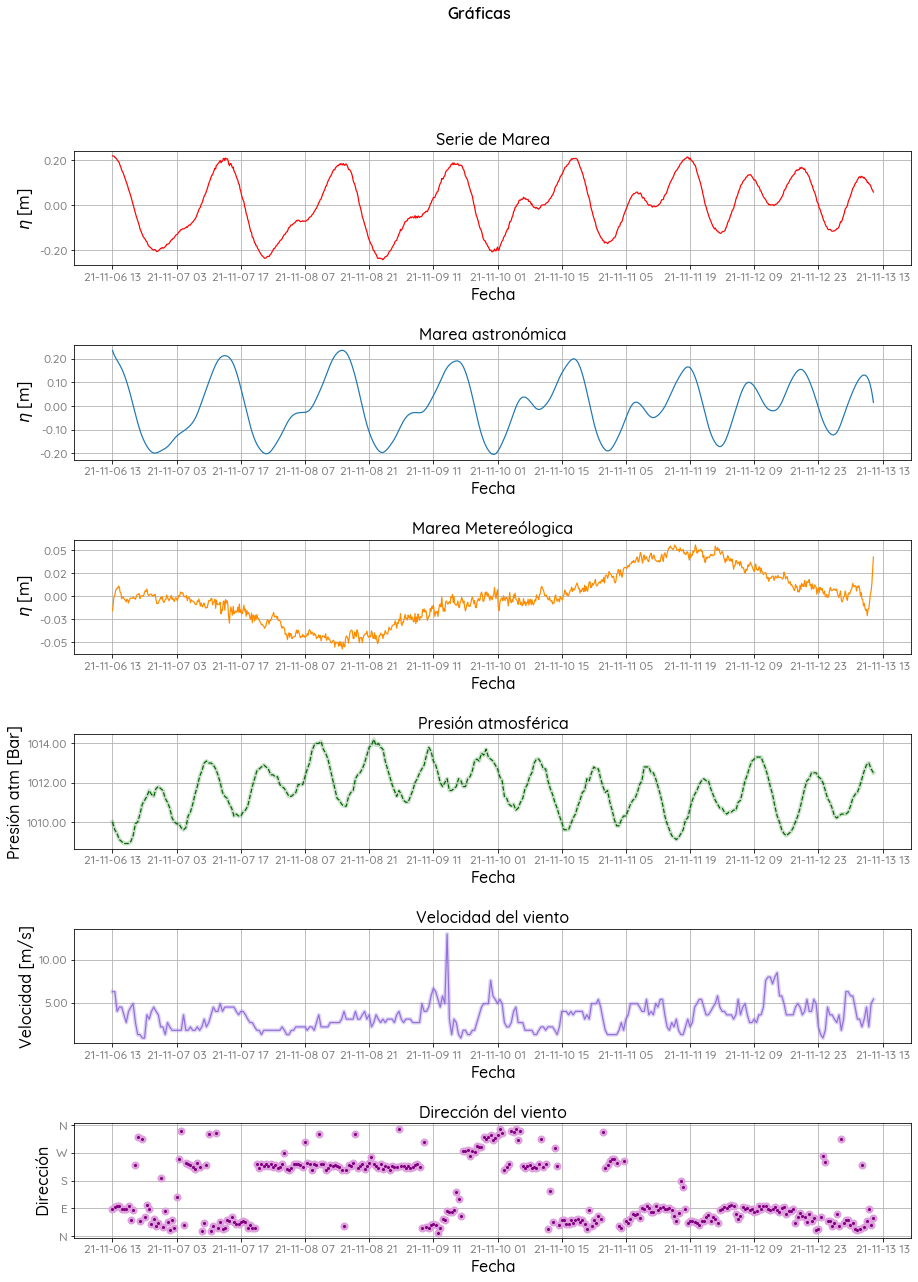

In [20]:
#Seri de marea y meteo

hourticks = ((t2[-1]-t2[0]).days*24 +(t2[-1]-t2[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([t2[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12
ytiks = np.arange(0,365,90)
ylabels = ['N','E','S','W','N']


fig, axs = plt.subplots(6,1,figsize=(15,20))
ax = axs[0]
ax.plot(df_tide.index.values, df_tide.Marea.values, color = 'r', lw = 1.2, ms=5)
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('$\eta$ [m]',size=16,fontproperties=prop1)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('Serie de Marea',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation=30)
ax.grid(True)

ax1 = axs[1]

ax1.plot(df_tide.index.values, df_tide.Astro.values, ms=5, lw = 1.2)
ax1.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax1.set_ylabel (' $\eta$ [m]',size=16,fontproperties=prop1)
ax1.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_title('Marea astronómica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax1.grid(True)


ax2 = axs[2]

ax2.plot(df_tide.index.values, df_tide.Meteo.values, color = 'darkorange', lw = 1.2, ms=5)
ax2.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax2.set_ylabel (' $\eta$ [m]',size=16,fontproperties=prop1)
ax2.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax2.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_title('Marea Metereólogica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax2.grid(True)

plt.xticks(rotation=0)
ax1.grid(True)
plt.subplots_adjust(hspace=0.5)


ax3 = axs[3]

ax3.plot(t2,Patm, color = 'darkgreen', lw = 4, ms=5, alpha = 0.2)
ax3.plot(t2,Patm, color = 'darkgreen', lw = 1.2, ms=5, ls = '--')

ax3.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax3.xaxis.set_major_formatter(date_format)
ax3.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax3.set_ylabel ('Presión atm [Bar]',size=16,fontproperties=prop1)
ax3.set_yticklabels(ax3.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax3.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.set_title('Presión atmosférica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax3.grid(True)


ax4 = axs[4]

ax4.plot(t2,Vwind, color = 'mediumpurple', lw = 4, ms=5, alpha= 0.3)
ax4.plot(t2,Vwind, color = 'mediumpurple', lw = 1.2, ms=5)

ax4.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax4.xaxis.set_major_formatter(date_format)
ax4.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax4.set_ylabel ('Velocidad [m/s]',size=16,fontproperties=prop1)
ax4.set_yticklabels(ax4.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax4.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax4.set_title('Velocidad del viento',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax4.grid(True)


ax5 = axs[5]

ax5.plot(t2,dir_degree, color = 'plum', lw = 1.2, ms=7, ls = ' ', marker = 'o')
ax5.plot(t2,dir_degree, color = 'purple', lw = 1.2, ms=2, ls = ' ', marker = 'o')

ax5.set_xticks(xticks_time)
ax5.set_yticks(ytiks)
# ax5.set_yticklabels(ylabels)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax5.xaxis.set_major_formatter(date_format)
ax5.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax5.set_ylabel (' Dirección ',size=16,fontproperties=prop1)
ax5.set_yticklabels(ylabels, fontproperties=prop1,color='gray',size = 12)
for label in ax5.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
# ax5.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax5.set_title('Dirección del viento',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax5.grid(True)


plt.subplots_adjust(hspace=0.7)
# ax.set_title('Velocidad superficial',size=15)
# plt.savefig('E:/Escritorio/INFORME 1ER AÑO UNAL/Anexo_B1/velocidad_2D.png',dpi=800,bbox_inches='tight',pad_inches=0)

# Velocity data

In [12]:
sensor_head_to_level = np.arange(0.50, 19,0.50)
sensor_head_to_level.shape

(37,)

In [6]:
# Definición de las profundidades
sensor_head_to_level = np.arange(0.50, 19,0.50)
print(sensor_head_to_level.shape)
depth = 19.2 + (sensor_head_to_level+0.70)*-1

(37,)


In [7]:
r_v1 = r"G:\My Drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\DATOS_CAMPO\DATOS_SAI_4_15_nov_2021\AWAC1000\AW100002.v1"
r_v2 = r"G:\My Drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\DATOS_CAMPO\DATOS_SAI_4_15_nov_2021\AWAC1000\AW100002.v2"
List_namesv1 = []
List_namesv2 = []
for i in range (0,40):
    if i < 37:
#         print(i+1, depth[i])
        names_v1 = 'u_'+str(depth[i])
        names_v2 = 'v_'+str(depth[i])
    else:
        names_v1 = 'u_'+str(i+1)
        names_v2 = 'v_'+str(i+1)
    List_namesv1.append(names_v1)
    List_namesv2.append(names_v2)
data_aw600u=pd.read_csv(r_v1,delimiter='\s+',encoding = "ISO-8859-1",names = List_namesv1)
data_aw600v=pd.read_csv(r_v2,delimiter='\s+',encoding = "ISO-8859-1",names = List_namesv2)

for i in range (38,41):
    data_aw600u = data_aw600u.drop(['u_'+str(i)], axis = 1)
    data_aw600v = data_aw600v.drop(['v_'+str(i)], axis = 1)
data_aw600u = data_aw600u.reset_index(drop=True)
data_aw600v = data_aw600v.reset_index(drop=True)
#-----------tiempo------------------------------
date_ini = datetime(2021,11,6,7,0)      # Incio de almacenamiento de datos de AWAC
date_fin = datetime(2021,11,14,14,30)    # Fin de almacenamiento de datos de AWAC
escala_temporal = 30                 # resolución temporal en minutos
minutos =int((date_fin-date_ini).days*24 + (date_fin-date_ini).seconds/3600)*60+(escala_temporal*2)  # minutos de almacenamiento en swan
time_flow = np.array([date_ini + timedelta(minutes=m) for m in range(0,int(minutos),escala_temporal)]) # Vector de timepos por hora, como se registro con Swan
print(data_aw600v.shape, time_flow.shape)
data_aw600u = data_aw600u.set_index(time_flow)
data_aw600v = data_aw600v.set_index(time_flow)

(400, 37) (400,)


In [8]:
ini_date_flow = datetime(2021,11,6,13,0)
end_date_flow = datetime(2021,11,14,5,30)
data_aw600u = data_aw600u[ini_date_flow:end_date_flow]
data_aw600v = data_aw600v[ini_date_flow:end_date_flow]
time_flow = time_flow[np.where(time_flow == ini_date_flow)[0][0]:np.where(time_flow == end_date_flow)[0][0]+1]

<AxesSubplot:>

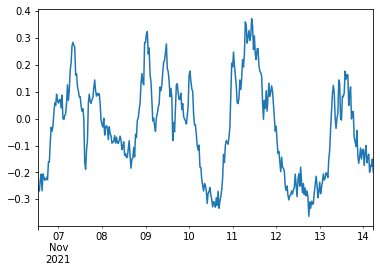

In [11]:
data_aw600v['v_18.0'].plot()

In [5]:
dic_u = dict(data_aw600u)
dic_v = dict(data_aw600v)
keys_dic_u = list(dic_u.keys())
keys_dic_v = list(dic_v.keys())
dic_flow = {}
for i in range (len(keys_dic_u)):
    names= 'vel_'+str(depth[i])
    flow = np.sqrt(dic_u[keys_dic_u[i]]**2 + dic_v[keys_dic_v[i]]**2)    
    dic_flow.update({names:flow})
df_flow = pd.DataFrame(data=dic_flow)

NameError: name 'data_aw600u' is not defined

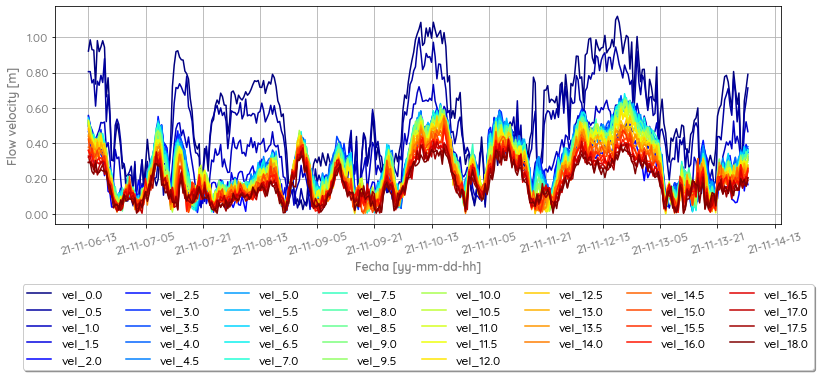

In [17]:
# Plot de la velocidad en diferentes velocidades

hourticks = ((time_flow[-1]-time_flow[0]).days*24 +(time_flow[-1]-time_flow[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([time_flow[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12


jet= cm.get_cmap('jet', len(list(df_flow)))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(list(df_flow)))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)

fig, ax = plt.subplots(figsize=(13,4))
for i in range(len(list(df_flow))):
    colorVal = scalarMap.to_rgba(i)
    ax.plot(time_flow, df_flow[list(df_flow)[len(list(df_flow))-i-1]].values,color=colorVal, label = list(df_flow)[len(list(df_flow))-i-1] )
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d-%H')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha [yy-mm-dd-hh]',size=12,fontproperties=prop2, color = 'gray')
ax.set_ylabel ('Flow velocity [m]',size=12,fontproperties=prop2, color = 'gray')
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=8, fontsize = 10,prop=prop1)
plt.xticks(rotation=15)
ax.grid()

xlabels = ax.get_xticklabels()

In [19]:
dic_direc = {} 
for i in range(len(list(dic_u.keys()))):
    direc_flow = []
    for j in range(len(time_flow)):
        direc_flowi = angulo_norte(dic_u[list(dic_u.keys())[i]][j],dic_v[list(dic_v.keys())[i]][j])
        direc_flow.append(direc_flowi)
    dic_direc.update({'dir_'+str(list(dic_flow.keys())[i][4:]):direc_flow})
df_direc = pd.DataFrame(data = dic_direc, index = time_flow)

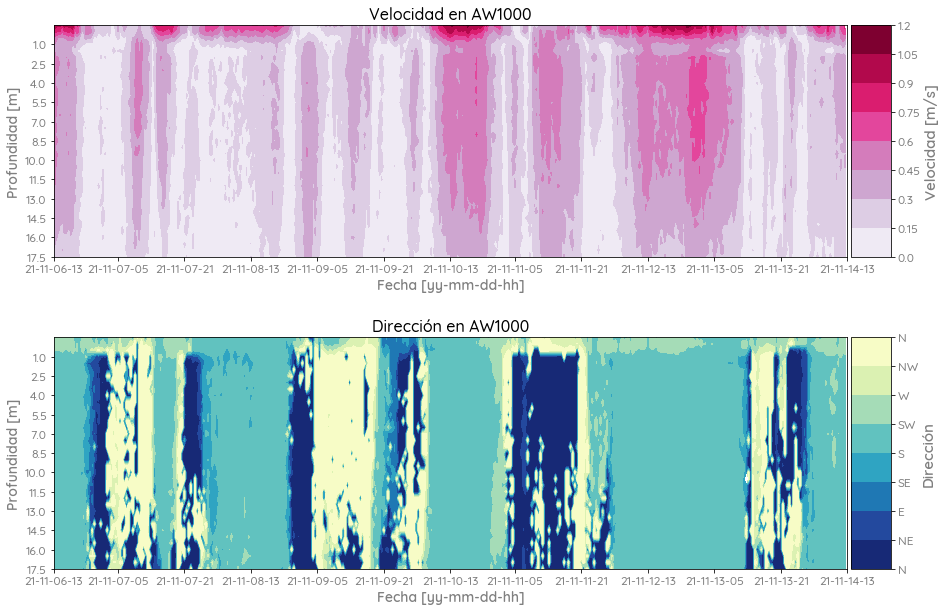

In [20]:
# Espectro de velocidad y dirección

x = np.arange(0,len(list(df_flow)),1)
y = np.arange(0,len(time_flow),1)
xx, yy = np.meshgrid(y,x)


fig, axs = plt.subplots(2,1,figsize = (15,10))
ax = axs[0]
colormap = cm.PuRd
# colormap = cm.coolwarm

pc = ax.contourf(xx, yy, df_flow.transpose(),cmap=colormap)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cb =fig.colorbar(pc, cax=cax, orientation='vertical')
cb.set_label('Velocidad [m/s]',size=15,fontproperties=prop2, color = 'gray')
cb.set_ticklabels(list(round(i,2) for i in cb.get_ticks()) 
                  , fontproperties=prop1, color='gray',size=12)
yticks = np.arange((len(list(df_flow))*0.5)-1,-0.5,-1.5)
ax.set_yticks(np.arange(0, len(list(df_flow))-1,3))
ax.set_yticklabels(yticks, fontproperties=prop1,color='gray',size = 12)
ax.set_xticks([int(np.linspace(0,len(time_flow),len(xticks_time))[i]) for i in range(len(np.linspace(0,len(time_flow),len(xticks_time))))])
ax.set_xticklabels(xlabels)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.set_xlabel ('Fecha [yy-mm-dd-hh]',size=14,fontproperties=prop2, color = 'gray')
ax.set_ylabel ('Profundidad [m]',size=14,fontproperties=prop2, color = 'gray')
ax.set_title('Velocidad en AW1000',size = 16,fontproperties=prop1)   # Subtítulo de la figu

ax1 = axs[1]
ylabels = ['N','NE','E','SE','S','SW','W','NW','N']
cmap_reversed = cm.get_cmap('YlGnBu_r')
# pc = ax1.contourf(xx, yy, df_direc.transpose(),levels = np.arange(0,360+90,90),cmap=colormap)
pc = ax1.contourf(xx, yy, df_direc.transpose(),levels = np.arange(0,360+45,45),cmap=cmap_reversed)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cb =fig.colorbar(pc, cax=cax, orientation='vertical')
cb.set_label('Dirección',size=15,fontproperties=prop2, color = 'gray')
cb.set_ticklabels(ylabels 
                  , fontproperties=prop1, color='gray',size=12)
# cb.set_ticklabels(list(round(i,2) for i in cb.get_ticks()) 
#                   , fontproperties=prop1, color='gray',size=12)
yticks = np.arange((len(list(df_flow))*0.5)-1,-0.5,-1.5)
ax1.set_yticks(np.arange(0, len(list(df_flow))-1,3))
ax1.set_yticklabels(yticks, fontproperties=prop1,color='gray',size = 12)
ax1.set_xticks([int(np.linspace(0,len(time_flow),len(xticks_time))[i]) for i in range(len(np.linspace(0,len(time_flow),len(xticks_time))))])
ax1.set_xticklabels(xlabels)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.set_xlabel ('Fecha [yy-mm-dd-hh]',size=14,fontproperties=prop2, color = 'gray')
ax1.set_ylabel ('Profundidad [m]',size=14,fontproperties=prop2, color = 'gray')
ax1.set_title('Dirección en AW1000',size = 16,fontproperties=prop1)   # Subtítulo de la figu
# ax1.plot(np.arange(0,997,1), df_tide.Astro.values, ms=5, lw = 1.2)


plt.subplots_adjust(hspace=0.35)

In [29]:
# ax1.plot(np.arange(0,997,1), df_tide.Astro.values, ms=5, lw = 1.2)
len(df_tide)

997

In [30]:
np.arange(0,997,1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Análisis de velocidad en la superficie

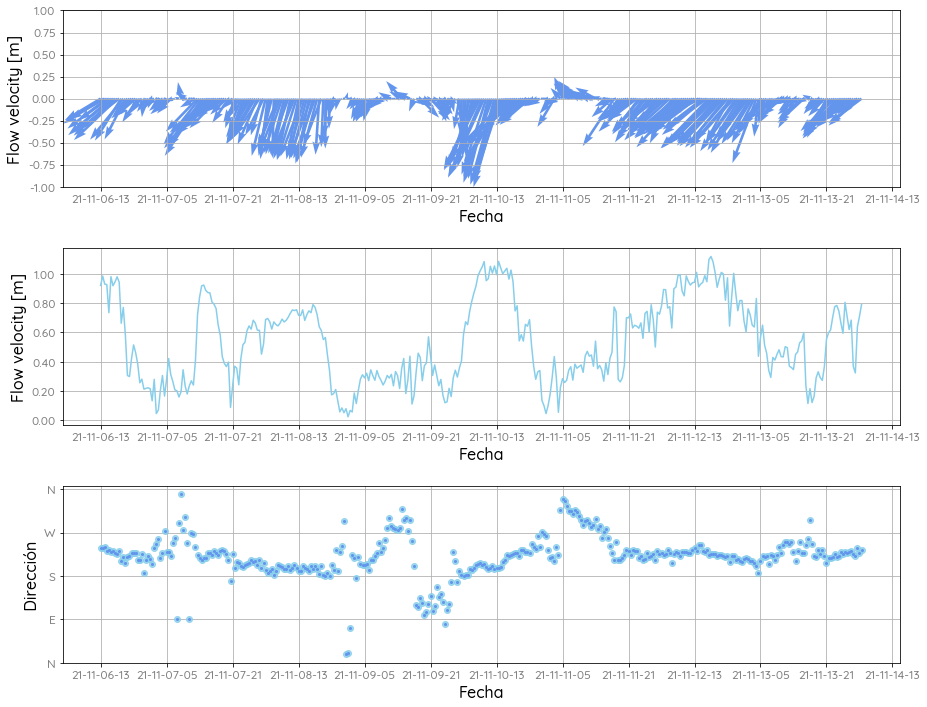

In [31]:
# Gráfica de comparación Magnitud y direción de la velocidad en la superficie

hourticks = ((time_flow[-1]-time_flow[0]).days*24 +(time_flow[-1]-time_flow[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([time_flow[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

u = data_aw600u['u_0.0'].values
v = data_aw600v['v_0.0'].values
Xx = np.arange(0, len(u), 1)
Yy = np.zeros(len(u))

fig, axs = plt.subplots(3,1,figsize=(15,12))
ax = axs[0]
# ax.quiver(Xx,Yy,u,v, angles='xy', scale_units='xy', scale=1)
# ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'moccasin',edgecolor='r',width=0.007, alpha = 0.2)
ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'cornflowerblue')
ax.set_ylim(-1.0, 1.0)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('Flow velocity [m]',size=16,fontproperties=prop1)
ax.set_xticks(np.arange(0, len(Xx)+ ((xticks_time[1]-xticks_time[0])/1800).seconds,((xticks_time[1]-xticks_time[0])/1800).seconds))
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.grid()

ax1 = axs[1]
ax1.plot(time_flow, df_flow['vel_0.0'].values, color='skyblue', lw = 1.5)# ax.set_ylim(-0.75, 1)
ax1.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d-%H')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax1.set_ylabel ('Flow velocity [m]',size=16,fontproperties=prop1)
ax1.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.grid()

ax2 = axs[2]
ax2.plot(time_flow, df_direc['dir_0.0'].values, ls = ' ', marker = 'o', ms= 6, color = 'skyblue', alpha=0.8)# ax.set_ylim(-0.75, 1)
ax2.plot(time_flow, df_direc['dir_0.0'].values, ls = ' ', marker = 'o', ms= 2, color = 'cornflowerblue')# ax.set_ylim(-0.75, 1)
ax2.set_yticks(ytiks)
ax2.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d-%H')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax2.set_ylabel (' Dirección ',size=16,fontproperties=prop1)
ax2.set_yticklabels(ylabels, fontproperties=prop1,color='gray',size = 12)
for label in ax2.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
# ax5.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.set_title('Dirección de la corriente en la superficie',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax2.grid(True)
plt.subplots_adjust(hspace=0.35)


In [35]:
depth = 17.0
Dic_vel_idepth = {'u':data_aw600u['u_'+str(depth)].values,'v':data_aw600v['v_'+str(depth)].values,'vel':df_flow['vel_'+str(depth)].values,'direc':df_direc['dir_'+str(depth)].values}
df_vel_idepth = pd.DataFrame(data=Dic_vel_idepth, index=data_aw600u.index.values)
df_vel_idepth = df_vel_idepth[df_tide.index.values[0]:df_tide.index.values[-1]]
time_flow_vel = time_flow[np.where(time_flow == ini_date)[0][0]:np.where(time_flow == end_date)[0][0]+1]

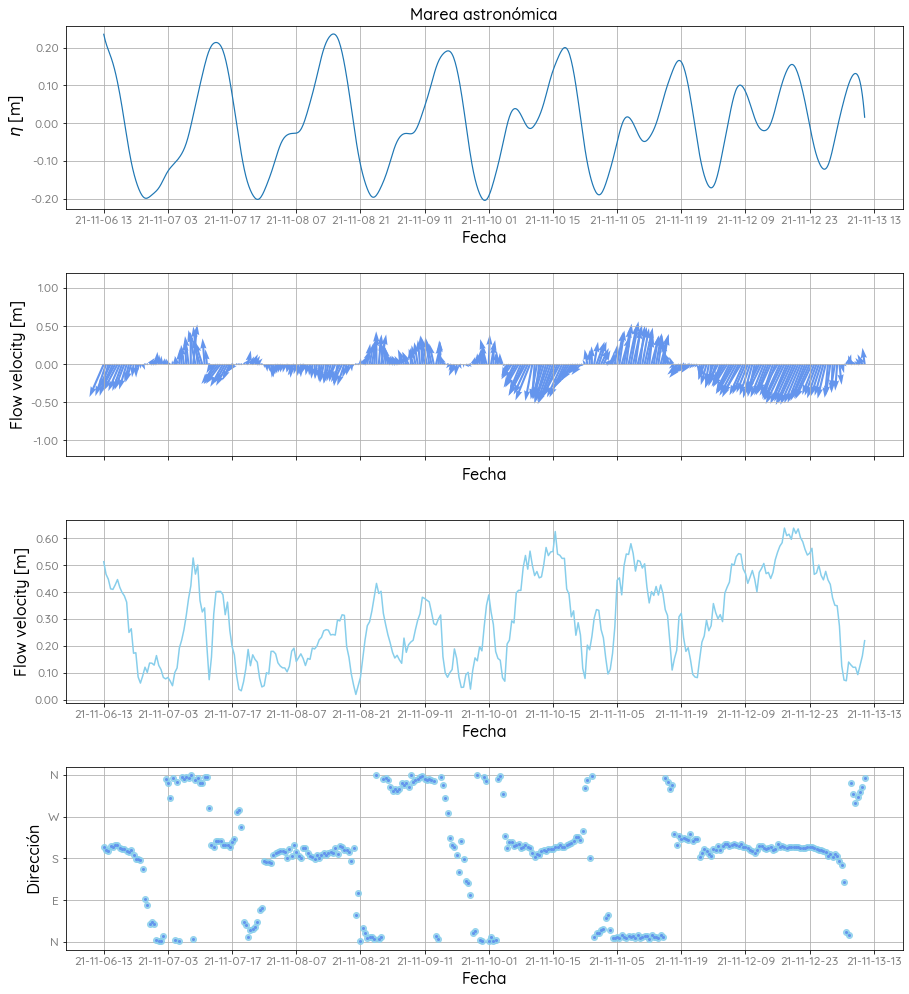

In [33]:
# Gráfica de comparación Magnitud y direción de la velocidad en la superficie
fig, axs = plt.subplots(4,1,figsize=(15,17))
hourticks = ((time_flow_vel[-1]-time_flow_vel[0]).days*24 +(time_flow_vel[-1]-time_flow_vel[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([time_flow_vel[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

ax0 = axs[0]

ax0.plot(df_tide.index.values, df_tide.Astro.values, ms=5, lw = 1.2)
ax0.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax0.xaxis.set_major_formatter(date_format)
ax0.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax0.set_ylabel (' $\eta$ [m]',size=16,fontproperties=prop1)
ax0.set_yticklabels(ax0.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax0.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.set_title('Marea astronómica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax0.grid(True)
xlabels = ax0.get_xticklabels()


u = df_vel_idepth.u.values
v = df_vel_idepth.v.values
Xx = np.arange(0, len(u), 1)
Yy = np.zeros(len(u))


ax = axs[1]
# ax.quiver(Xx,Yy,u,v, angles='xy', scale_units='xy', scale=1)
# ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'moccasin',edgecolor='r',width=0.007, alpha = 0.2)
# ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'cornflowerblue',width=0.0025)
ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'cornflowerblue',width=0.0025)

ax.set_ylim(-1.2, 1.2)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('Flow velocity [m]',size=16,fontproperties=prop1)
ax.set_xticks(np.arange(0, len(Xx)+ ((xticks_time[1]-xticks_time[0])/1800).seconds,((xticks_time[1]-xticks_time[0])/1800).seconds))
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.grid()


ax1 = axs[2]
ax1.plot(time_flow_vel, df_vel_idepth.vel.values, color='skyblue', lw = 1.5)# ax.set_ylim(-0.75, 1)
ax1.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d-%H')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax1.set_ylabel ('Flow velocity [m]',size=16,fontproperties=prop1)
ax1.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.grid()


ax2 = axs[3]
ax2.plot(time_flow_vel, df_vel_idepth.direc.values, ls = ' ', marker = 'o', ms= 6, color = 'skyblue', alpha=0.8)# ax.set_ylim(-0.75, 1)
ax2.plot(time_flow_vel, df_vel_idepth.direc.values, ls = ' ', marker = 'o', ms= 2, color = 'cornflowerblue')# ax.set_ylim(-0.75, 1)
ax2.set_yticks(ytiks)
ax2.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d-%H')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax2.set_ylabel (' Dirección ',size=16,fontproperties=prop1)
ax2.set_yticklabels(ylabels, fontproperties=prop1,color='gray',size = 12)
for label in ax2.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
# ax5.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.set_title('Dirección de la corriente en la superficie',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax2.grid(True)
plt.subplots_adjust(hspace=0.35)
# plt.savefig('marea_vel_idepth_0m.pdf', dpi= 800, bbox_inches='tight',pad_inches=0)

In [37]:
len(df_tide.index.values)/3

332.3333333333333

In [38]:
len(df_vel_idepth.u.values)

333

In [39]:
333/3

111.0

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Mi unidad\\TESIS_MAESTRIA_PAULAE\\MODELO_NUMERICO\\CODIGOS\\Analisis_Datos\\AW1000\\AW1000_AQ2/aw1000_at5-0_tide_0.jpg'

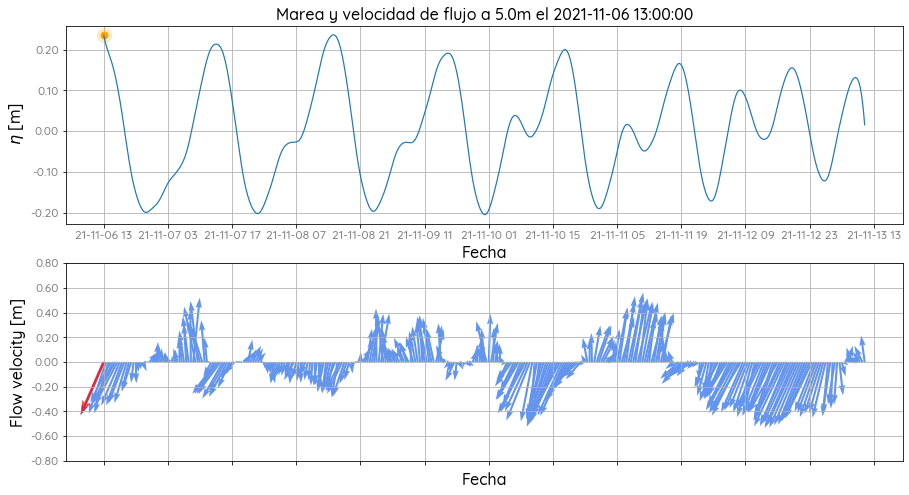

In [34]:

for i in range(0,len(df_tide.index.values),6):
#     print(i)
    fig, axs = plt.subplots(2,1,figsize=(15,8))
    hourticks = ((time_flow_vel[-1]-time_flow_vel[0]).days*24 +(time_flow_vel[-1]-time_flow_vel[0]).seconds/3600+12) # Mover parámetro 12
    xticks_time = np.array([time_flow_vel[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12
#     fig.suptitle("Marea y velocidad de flujo a "+str(depth)+'m el '+str(datetime.fromtimestamp(df_tide.index.values[i].astype('O')/1e9)+timedelta(hours=5)), size = 16,fontproperties=prop2)     # Titulo de la figura

    ax0 = axs[0]
    ax0.plot(df_tide.index.values[i],df_tide.Astro.values[i], marker = 'o', color= 'orange', ls = ' ', ms = 14, alpha = 0.2)
    ax0.plot(df_tide.index.values[i],df_tide.Astro.values[i], marker = 'o', color= 'orange', ls = ' ', ms = 7)
    ax0.plot(df_tide.index.values, df_tide.Astro.values, ms=5, lw = 1.2)
    ax0.set_xticks(xticks_time)
    date_format = mdates.DateFormatter('%y-%m-%d %H')
    ax0.xaxis.set_major_formatter(date_format)
    ax0.set_xlabel ('Fecha',size=16,fontproperties=prop1)
    ax0.set_ylabel (' $\eta$ [m]',size=16,fontproperties=prop1)
    ax0.set_yticklabels(ax0.get_yticks(), fontproperties=prop1,color='gray',size = 12)
    for label in ax0.get_xticklabels():
        label.set_fontproperties(prop1)
        label.set_color('gray')
        label.set_size(12)
    ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax0.set_title("Marea y velocidad de flujo a "+str(depth)+'m el '+str(datetime.fromtimestamp(df_tide.index.values[i].astype('O')/1e9)+timedelta(hours=5)),size = 16,fontproperties=prop1)   # Subtítulo de la figura
    # ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
    #           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
    ax0.grid(True)
    xlabels = ax0.get_xticklabels()


    u = df_vel_idepth.u.values
    v = df_vel_idepth.v.values
    Xx = np.arange(0, len(u), 1)
    Yy = np.zeros(len(u))

    j = int(i/3)
    ax = axs[1]
    # ax.quiver(Xx,Yy,u,v, angles='xy', scale_units='xy', scale=1)
    # ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'moccasin',edgecolor='r',width=0.007, alpha = 0.2)
    # ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'cornflowerblue',width=0.0025)
    ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'cornflowerblue',width=0.0025)
    ax.quiver(Xx[j],Yy[j],u[j],v[j], angles='uv', scale_units='xy', scale=1, color = 'red',width=0.0035, alpha = 0.7)

    ax.set_ylim(-0.8, 0.8)
    ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
    ax.set_ylabel ('Flow velocity [m]',size=16,fontproperties=prop1)
    ax.set_xticks(np.arange(0, len(Xx)+ ((xticks_time[1]-xticks_time[0])/1800).seconds,((xticks_time[1]-xticks_time[0])/1800).seconds))
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
    for label in ax.get_xticklabels():
        label.set_fontproperties(prop1)
        label.set_color('gray')
        label.set_size(12)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid()
    path = r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS\Analisis_Datos\AW1000\AW1000_AQ2"
    plt.savefig(path+'/aw1000_at'+str(depth)[0:-2]+'-'+str(depth)[-1:]+'_tide_'+str(i)+'.jpg', dpi= 300, bbox_inches='tight',pad_inches=0)

In [ ]:
from PIL import Image, ImageSequence
import sys, os
import glob

In [ ]:
frames=[]
imgs = glob.glob('G:/Mi unidad/TESIS_MAESTRIA_PAULAE/MODELO_NUMERICO/CODIGOS/Analisis_Datos/AW1000/AW1000_AQ2/aw1000_at*.jpg')
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
ruta = str('G:/Mi unidad/TESIS_MAESTRIA_PAULAE/MODELO_NUMERICO/CODIGOS/Analisis_Datos/AW1000/AW1000_AQ2/aw1000_at'+str(depth)[0:-2]+'-'+str(depth)[-1:]+'_tide_.gif')
frames[0].save(ruta,format = 'GIF', append_images = frames[1:],save_all = True, duration = 300, loop = 0)

**TAREAS**
- Promediar cada cada hora la marea para obtener el mismo tamañano de datos de la velocidad y ver el correlograma
- Identificar en cada intervalo de tiempo la magnitud de la marea y la velocidad en alguna profundidades ***ok!!***
- **Identificar si la serie de marea modula la corriente**
- Poner las variables en todas las graficas: 
    - Magnitud
    - Dirección
    - Componente x de la velocidad 
    - Componente y de la velocidad
- Graficar en un mismo plot la componente superficial de la velocidad y la promedidada

In [ ]:
# plt.figure()
# plt.xcorr(df_tide.Astro.values,df_vel_idepth.vel.values,maxlags = 150, normed =True, lw =2)
# plt.title('Autocorrelograma de air_filt[:,40,40]')
# plt.xlim(0,50)

## Análisis de corrientes promidadas

In [ ]:
flow_mean = df_flow[df_tide.index.values[0]:df_tide.index.values[-1]].mean(axis=1)
u_mean = data_aw600u[df_tide.index.values[0]:df_tide.index.values[-1]].mean(axis=1)
v_mean = data_aw600v[df_tide.index.values[0]:df_tide.index.values[-1]].mean(axis=1)

In [ ]:
direc_flow_mean = np.zeros(shape = (len(time_flow_vel)))
for i in range (len(time_flow_vel)):
    direc_flow_mean[i] = angulo_norte(u_mean[i], v_mean[i])

In [ ]:
# Gráfica de comparación Magnitud y direción de la velocidad en la superficie
fig, axs = plt.subplots(4,1,figsize=(15,17))
hourticks = ((time_flow_vel[-1]-time_flow_vel[0]).days*24 +(time_flow_vel[-1]-time_flow_vel[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([time_flow_vel[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

ax0 = axs[0]

ax0.plot(df_tide.index.values, df_tide.Astro.values, ms=5, lw = 1.2)
ax0.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax0.xaxis.set_major_formatter(date_format)
ax0.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax0.set_ylabel (' $\eta$ [m]',size=16,fontproperties=prop1)
ax0.set_yticklabels(ax0.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax0.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.set_title('Marea astronómica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax0.grid(True)
xlabels = ax0.get_xticklabels()


u = u_mean
v = v_mean
Xx = np.arange(0, len(u), 1)
Yy = np.zeros(len(u))


ax = axs[1]
# ax.quiver(Xx,Yy,u,v, angles='xy', scale_units='xy', scale=1)
# ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'moccasin',edgecolor='r',width=0.007, alpha = 0.2)
ax.quiver(Xx,Yy,u,v, angles='uv', scale_units='xy', scale=1, color = 'cornflowerblue',width=0.0025)
ax.set_ylim(-1, 1)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('Flow velocity [m]',size=16,fontproperties=prop1)
ax.set_xticks(np.arange(0, len(Xx)+ ((xticks_time[1]-xticks_time[0])/1800).seconds,((xticks_time[1]-xticks_time[0])/1800).seconds))
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.grid()


ax1 = axs[2]
ax1.plot(time_flow_vel, flow_mean, color='skyblue', lw = 1.5)# ax.set_ylim(-0.75, 1)
ax1.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d-%H')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax1.set_ylabel ('Flow velocity [m]',size=16,fontproperties=prop1)
ax1.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.grid()


ax2 = axs[3]
ax2.plot(time_flow_vel, direc_flow_mean, ls = ' ', marker = 'o', ms= 6, color = 'skyblue', alpha=0.8)# ax.set_ylim(-0.75, 1)
ax2.plot(time_flow_vel, direc_flow_mean, ls = ' ', marker = 'o', ms= 2, color = 'cornflowerblue')# ax.set_ylim(-0.75, 1)
ax2.set_yticks(ytiks)
ax2.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d-%H')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax2.set_ylabel (' Dirección ',size=16,fontproperties=prop1)
ax2.set_yticklabels(ylabels, fontproperties=prop1,color='gray',size = 12)
for label in ax2.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
# ax5.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.set_title('Dirección de la corriente en la superficie',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax2.grid(True)
plt.subplots_adjust(hspace=0.35)
# plt.savefig('marea_vel_surface_mean.png', dpi= 800, bbox_inches='tight',pad_inches=0)

# 

In [ ]:
U_air,S_air,Vh_air = np.linalg.svd(df_flow, full_matrices=False)

In [ ]:
print(U_air.shape, S_air.shape,Vh_air.shape, df_flow.shape)

In [ ]:
plt.figure()
plt.plot(((S_air/np.sum(S_air))*100), marker = 'o')
plt.xlim(0,5)
plt.grid()

In [ ]:
nmod = 3

In [ ]:
for i in range(nmod):
    plt.figure()
    plt.plot(U_air[:,i])
    plt.grid()

In [ ]:
fig, ax = plt.subplots(figsize = (10,20))
colormap = cm.RdBu
# colormap = cm.coolwarm
pc = ax.imshow(Vh_air[:7,:],cmap=colormap)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cb =fig.colorbar(pc, cax=cax, orientation='vertical',use_gridspec=True)
# cb.set_label('Velocidad [m/s]',size=15,fontproperties=prop2, color = 'gray')
cb.set_ticklabels(list(round(i,2) for i in cb.get_ticks()) 
                  , fontproperties=prop1, color='gray',size=12)
# yticks = np.arange((len(list(df_flow))*0.5)-1,-0.5,-1.5)
# ax.set_yticks(np.arange(0, len(list(df_flow))-1,3))
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
# ax.set_xticks([int(np.linspace(0,len(time_flow),len(xticks_time))[i]) for i in range(len(np.linspace(0,len(time_flow),len(xticks_time))))])
# ax.set_xticklabels(xlabels)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.set_xlabel ('profunidades',size=14,fontproperties=prop2, color = 'gray')
ax.set_ylabel ('Componentes principales',size=14,fontproperties=prop2, color = 'gray')
# ax.set_title('Velocidad en AW1000',size = 16,fontproperties=prop1)   # Subtítulo de la figu